In [29]:
import pickle
import os
from traffic_equilibrium.solver import Result as FWResult
from traffic_equilibrium.graph import DiGraph
from shapely.geometry import LineString
import geopandas as gpd
import pandas as pd
from shapely.geometry import shape
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [2]:
import osmnx as ox
import contextily as ctx
import matplotlib.pyplot as plt

In [113]:
rate = 0.575

mileage = 641 + 34 + 34 + 31 + 120 + 80 + 486 + 470
mileage, mileage * rate

(1896, 1090.1999999999998)

0.0

In [53]:
pgh = ox.geocode_to_gdf('Cathedral of Learning, Pittsburgh, PA', buffer_dist=5000)

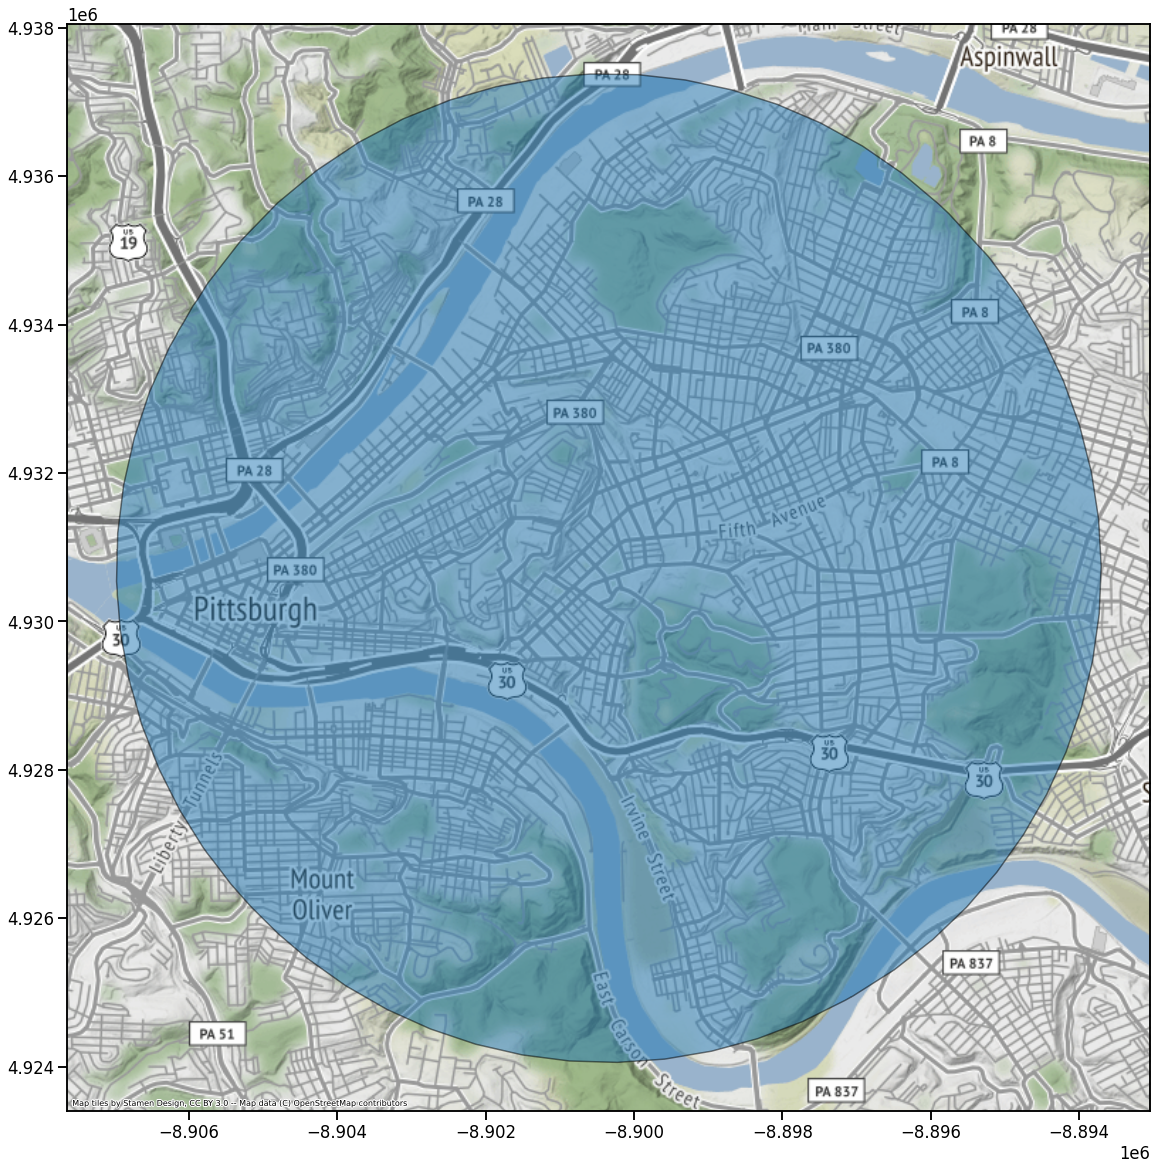

In [60]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = pgh.to_crs(epsg=3857).plot(alpha=0.5, edgecolor='k', ax=ax)
ctx.add_basemap(ax)

In [43]:
pgh = ox.geometries_from_place('Pittsburgh, PA', {'place': True})

/home/matt/.virtualenvs/traffic-equilibrium/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
pgh

geometry  \
0  POLYGON ((-80.00878 40.43968, -80.00867 40.440...   

                                          place_name  bbox_north  bbox_south  \
0  Schenley Park, Pittsburgh, Allegheny County, P...   40.441494   40.428319   

   bbox_east  bbox_west  
0 -79.932597 -79.950873

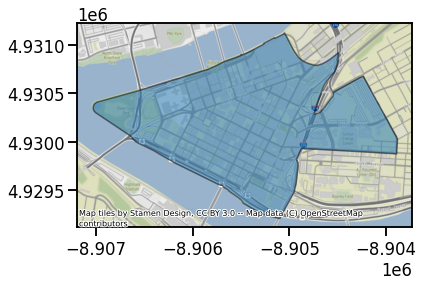

In [7]:
ax = ox.geocode_to_gdf('Downtown, Pittsburgh, PA',
						buffer_dist=0.0).to_crs(epsg=3857).plot(alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

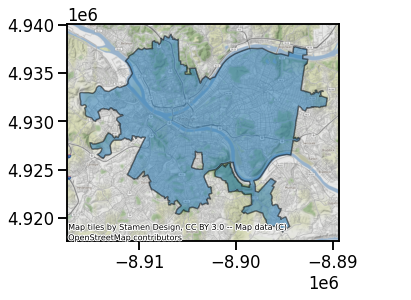

In [4]:
ax = ox.geocode_to_gdf('Pittsburgh, PA',
						buffer_dist=0.0).to_crs(epsg=3857).plot(alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

Text(0.3, 9.5, 'Congestion upper bound?')

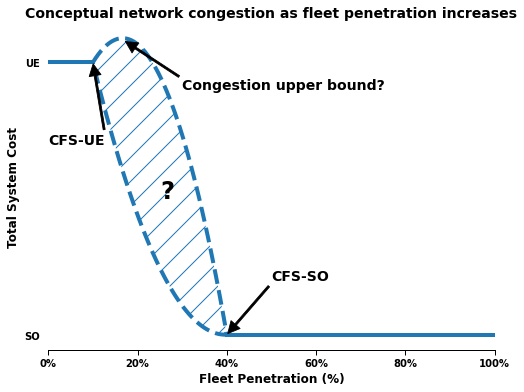

In [115]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set_context("paper")
matplotlib.style.use('./figures.mplstyle')

cfs_l = 0.1
cfs_u = 0.4
tstt_ue = 10
tstt_so = 5
fig, ax = plt.subplots(figsize=(8, 6))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
ax.set(
    yticks=[tstt_so, tstt_ue],
    yticklabels=["SO", "UE"],
    xlabel="Fleet Penetration (%)",
    ylabel="Total System Cost",
    title="Conceptual network congestion as fleet penetration increases",
    #ylim=[tstt_so-0.2, tstt_ue +1],
    xlim=[0, 1],
)
ax.grid(False)
tab10 = plt.get_cmap("tab10")
ax.plot([0.0, cfs_l], [tstt_ue, tstt_ue], color=tab10(0))
ax.annotate("CFS-UE",
            xy=(cfs_l, tstt_ue), xytext=(0, tstt_ue -1.5),
            arrowprops=dict(facecolor='black',shrink=0.02, width=2)
)
ax.annotate("CFS-SO",
            xy=(cfs_u, tstt_so), xytext=(cfs_u+0.1, tstt_so +1),
            arrowprops=dict(facecolor='black', shrink=0.02, width=2)
)
ax.plot([cfs_u, 1.0], [tstt_so, tstt_so], color=tab10(0))
def curve(p1, t):
    p0 = tstt_ue
    p2 = tstt_so
    return p0*(1-t)**2 + 2*(1-t)*t*p1 + p2*t**2 
x = np.linspace(cfs_l, cfs_u)
t = np.linspace(0, 1)

ax.fill_between(x, curve(1.2*tstt_ue, t), curve(0.99*tstt_so, t), edgecolor=tab10(0), facecolor="none", linewidth=4, linestyle='--', hatch='/')
ax.annotate("?", xy=(0.5*(cfs_l + cfs_u), 0.5*(tstt_ue+tstt_so)), fontsize="xx-large")
ax.annotate("Congestion upper bound?",
            xy=(0.17, tstt_ue+0.4),
            xytext=(0.3, tstt_ue-0.5),
            arrowprops=dict(facecolor='black', shrink=0.02, width=2)
)

In [35]:
tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

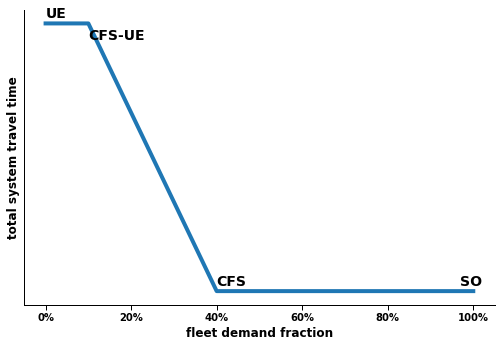

In [16]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.ticker as ticker
sns.set_context("paper")
matplotlib.style.use('./figures.mplstyle')

fleet_demand = 'fleet demand fraction'
tstt = 'total system travel time'
fake_data = []
tstt_ue = 10
tstt_so = 5
cfs_l = 0.1
cfs_u = 0.4
m = (1.5*tstt_ue - tstt_so)/ (cfs_l - cfs_u)
for i in np.linspace(0, 1,101):
    for j in range(100):
        if i <= cfs_l:
            fake_data.append((i, tstt_ue))
        elif i >= cfs_u:
            fake_data.append((i, tstt_so))
        else:
            break
            f = (i - cfs_l) / (cfs_u - cfs_l)
            p = 0.15
            if f <= p:
                t = np.random.normal(tstt_ue + 10*f + 0.1, 4-f)
            else:
                t = np.random.normal(1.1*tstt_ue - 10*(f - p), 4 - f)
            fake_data.append((i, max(tstt_so, t)))
            
mixed_tap_df = pd.DataFrame(
    fake_data,
    columns=[fleet_demand, tstt]
)

g = sns.relplot(data=mixed_tap_df, x=fleet_demand, y=tstt, kind='line', ci=0.999999, height=5, aspect=1.5)
#ax = sns.lineplot(data=mixed_tap_df, x=fleet_demand, y=tstt, ci='sd')
#sns.despine()
ax = g.axes[0][0]
ax.set_yticks([])
ax.annotate('UE', xy=(0.0, tstt_ue+0.1))
ax.annotate('SO', xy=(0.97, tstt_so+0.1))
ax.annotate('CFS', xy=(cfs_u, tstt_so + 0.1))
ax.annotate('CFS-UE', xy=(cfs_l, tstt_ue - 0.3))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))

In [3]:
def read_tntp_node_file(fname):
    df = pd.read_csv(fname, sep='\t')
    df.rename(columns={col: col.lower() for col in df.columns}, inplace=True)
    df.drop(columns=';', inplace=True)
    df.set_index('node', inplace=True)
    df['node_geometry'] = gpd.points_from_xy(df.x, df.y, crs="EPSG:4326")
    return df

def read_tntp_link_file(fname):
    df = pd.read_csv(fname,
                     sep='\t',
                     skiprows=7
                    )
    df.drop(columns=['~', ';'], inplace=True)
    df.index.name = 'link_id'
    return df

def to_line(row):
    alpha = 0.001
    x0 = row.init_node_geometry.x
    y0 = row.init_node_geometry.y
    x1 = row.term_node_geometry.x
    y1 = row.term_node_geometry.y
    dx = (x1 - x0)
    dy = (y1 - y0)
    z = (dx**2 + dy**2)**0.5
    return LineString([
        (x0 - alpha * dy/z, y0 + alpha * dx/z),
        (x1 - alpha * dy/z, y1 + alpha * dx/z)
    ])
    

def link_geometry(link_df, node_df):
    geom = 'node_geometry'
    node_geom = node_df[[geom]]
    link_df = link_df.reset_index().merge(
        node_geom.rename(columns={geom: f'init_{geom}'}),
        left_on='init_node', right_on='node',
    ).merge(
        node_geom.rename(columns={geom: f'term_{geom}'}),
        left_on='term_node', right_on='node',
    )
    link_df['link_geometry'] = link_df.apply(
        to_line,
        axis=1
    )
    return gpd.GeoDataFrame(
        link_df.set_index('link_id').sort_index(),
        geometry='link_geometry'
    )
    

In [4]:
sioux_falls_nodes = read_tntp_node_file('../test/fixtures/TransportationNetworks/SiouxFalls/SiouxFalls_node.tntp')
sioux_falls_nodes.head()

x          y               node_geometry
node                                                  
1    -96.770420  43.612828  POINT (-96.77042 43.61283)
2    -96.711251  43.605813  POINT (-96.71125 43.60581)
3    -96.774303  43.572962  POINT (-96.77430 43.57296)
4    -96.747168  43.563654  POINT (-96.74717 43.56365)
5    -96.731569  43.564034  POINT (-96.73157 43.56403)

In [5]:
sioux_falls_links = read_tntp_link_file('../test/fixtures/TransportationNetworks/SiouxFalls/SiouxFalls_net.tntp')
sioux_falls_links.head()

init_node  term_node      capacity  length  free_flow_time     b  \
link_id                                                                     
0                1          2  25900.200640       6               6  0.15   
1                1          3  23403.473190       4               4  0.15   
2                2          1  25900.200640       6               6  0.15   
3                2          6   4958.180928       5               5  0.15   
4                3          1  23403.473190       4               4  0.15   

         power  speed  toll  link_type  
link_id                                 
0            4      0     0          1  
1            4      0     0          1  
2            4      0     0          1  
3            4      0     0          1  
4            4      0     0          1

In [6]:
sioux_falls_links = link_geometry(sioux_falls_links, sioux_falls_nodes)
sioux_falls_links.head()

init_node  term_node      capacity  length  free_flow_time     b  \
link_id                                                                     
0                1          2  25900.200640       6               6  0.15   
1                1          3  23403.473190       4               4  0.15   
2                2          1  25900.200640       6               6  0.15   
3                2          6   4958.180928       5               5  0.15   
4                3          1  23403.473190       4               4  0.15   

         power  speed  toll  link_type          init_node_geometry  \
link_id                                                              
0            4      0     0          1  POINT (-96.77042 43.61283)   
1            4      0     0          1  POINT (-96.77042 43.61283)   
2            4      0     0          1  POINT (-96.71125 43.60581)   
3            4      0     0          1  POINT (-96.71125 43.60581)   
4            4      0     0          1  POINT (-96.77430 43.57296)   

                 term_node_geometry  \
link_id                               
0        POINT (-96.71125 43.60581)   
1        POINT (-96.77430 43.57296)   
2        POINT (-96.77042 43.61283)   
3        POINT (-96.71164 43.58759)   
4        POINT (-96.77042 43.61283)   

                                             link_geometry  
link_id                                                     
0        LINESTRING (-96.77030 43.61382, -96.71113 43.6...  
1        LINESTRING (-96.76942 43.61273, -96.77331 43.5...  
2        LINESTRING (-96.71137 43.60482, -96.77054 43.6...  
3        LINESTRING (-96.71025 43.60579, -96.71064 43.5...  
4        LINESTRING (-96.77530 43.57306, -96.77142 43.6...

In [7]:
def unpickle(fname: str):
    with open(fname, 'rb') as fp:
        return pickle.load(fp)
    
class FleetData:
    def __init__(self, data, prefix):
        self.data = data
        self.prefix = prefix
        
    def key(self, k):
        return '_'.join([self.prefix, k])
    
    @property
    def path_flow(self):
        return self.data[self.key('flow')]
    
    @property
    def link_flow(self):
        return self.link_path_incidence @ self.path_flow
    
    @property
    def usable_path_mask(self):
        return self.data[self.key('paths')]
    
    @property
    def trip_path_incidence(self):
        return self.data['trip_path']
    
    @property
    def link_path_incidence(self):
        return self.data['link_path']
    
    @property
    def trip_flow(self):
        return self.trip_path_incidence @ self.path_flow
    
    @property
    def link_path_index(self):
        lpm_coo = self.link_path_incidence.tocoo()
        return pd.DataFrame({
            'link_id': lpm_coo.row,
            'path_id': lpm_coo.col,
        }).set_index('path_id').sort_index()
    
    def trip_path_flow(self, trip_id):
        return (
            self.trip_path_incidence[trip_id]
                .multiply(self.path_flow)
        ) 
    
    def trip_link_flow(self, trip_id):
        return (
            self.link_path_incidence
            @ self.trip_path_flow(trip_id).T
        ).toarray().squeeze()
    
    def to_path_dataframe(self):
        tpm = self.trip_path_incidence.toarray()
        n_trips, n_paths = tpm.shape
        trip_id = np.zeros(n_paths, dtype=np.uint)
        for i in range(n_trips):
            trip_mask = tpm[i].astype(np.bool)
            trip_id[trip_mask] = i
        df = pd.DataFrame(
            {
                self.prefix: self.path_flow,
                'path_id': np.arange(n_paths),
                'trip_id': trip_id,
            }
        ).set_index(['trip_id', 'path_id'])
        return df
    
    def to_link_dataframe(self):
        return pd.DataFrame({
            self.prefix: self.link_flow,
            'link_id': np.arange(len(self.link_flow))
        }).set_index('link_id')


class CriticalFleetSizeResult:
    def __init__(self, data):
        self.data = data
        self.fleet = FleetData(self.data, "fleet")
        self.user = FleetData(self.data, "user")
        
    @property
    def fleet_trip_fraction(self):
        return self.fleet.trip_flow / (self.fleet.trip_flow + self.user.trip_flow)
        
    @property
    def fleet_path_fraction(self):
        return self.fleet.path_flow / (self.fleet.path_flow + self.user.path_flow)
    
    @property
    def fleet_link_fraction(self):
        return self.fleet.link_flow / (self.fleet.link_flow + self.user.link_flow)
    
    def to_path_dataframe(self):
        return self.fleet.to_path_dataframe().join(self.user.to_path_dataframe())
    
    def to_link_dataframe(self):
        return self.fleet.to_link_dataframe().join(self.user.to_link_dataframe())
    
    @property
    def link_path_index(self):
        return self.fleet.link_path_index
    
    @property
    def link_flow(self):
        return self.fleet.link_flow + self.user.link_flow
    

class Result:
    kinds = ('mcr', 'lp', 'mip')
    
    def __init__(self, prefix):
        for kind in self.kinds:
            try:
                data = CriticalFleetSizeResult(unpickle(f"{prefix}.{kind}.pkl"))
            except:
                data = None
            setattr(self, kind, data)
            
    def to_path_dataframe(self):
        dfs = []
        new_index = 'solution_concept'
        for kind in self.kinds:
            result = getattr(self, kind)
            if result is not None:
                df = result.to_path_dataframe()
                df[new_index] = kind
                df.set_index(new_index, append=True, inplace=True)
                dfs.append(df)
        df = (pd.concat(dfs)
                .melt(ignore_index=False, var_name='flow_class', value_name='flow')
                .set_index('flow_class', append=True)
                .sort_index()
             )
        return df
    
    def to_link_dataframe(self):
        dfs = []
        new_index = 'solution_concept'
        for kind in self.kinds:
            result = getattr(self, kind)
            if result is not None:
                df = result.to_link_dataframe()
                df[new_index] = kind
                df.set_index(new_index, append=True, inplace=True)
                dfs.append(df)
        df = (pd.concat(dfs)
                .melt(ignore_index=False, var_name='flow_class', value_name='flow')
                .set_index('flow_class', append=True)
                .sort_index()
             )
        return df
        
    
    @property
    def link_path_index(self):
        for kind in self.kinds:
            result = getattr(self, kind)
            if result is not None:
                return result.link_path_index

In [10]:
pgh = Result("../pgh-cathedral-5k-0.5-demand")
sioux_falls = Result("../sioux-falls-cfs")

In [16]:
link_flow_df = pgh.to_link_dataframe() # sioux_falls.to_link_dataframe()
aggregate_link_flow = link_flow_df.groupby(['link_id', 'solution_concept']).flow.sum()
aggregate_link_flow.name = 'aggregate_flow'
link_flow_df = link_flow_df.join(aggregate_link_flow).join(sioux_falls_links.capacity)

In [17]:
link_flow_df["V/C"] = link_flow_df.aggregate_flow / link_flow_df.capacity
link_flow_df["Fleet V/C"] = link_flow_df.flow / link_flow_df.capacity
link_flow_df["link_flow_fraction"] = link_flow_df.flow / link_flow_df.aggregate_flow

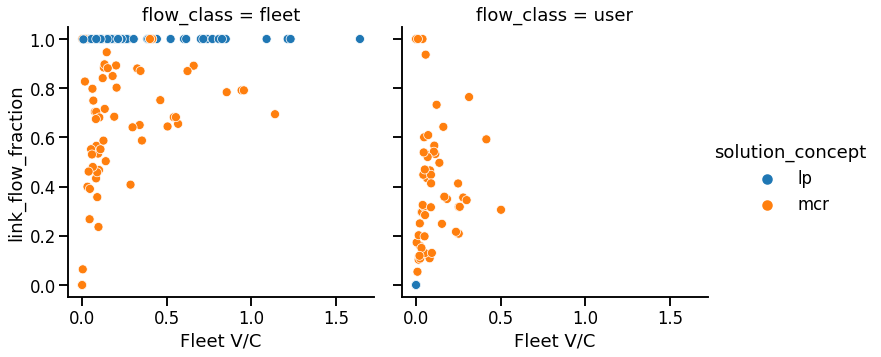

In [18]:
sns.relplot(data=link_flow_df,
                x="Fleet V/C",
                y="link_flow_fraction",
                col="flow_class",
                hue="solution_concept"
               )

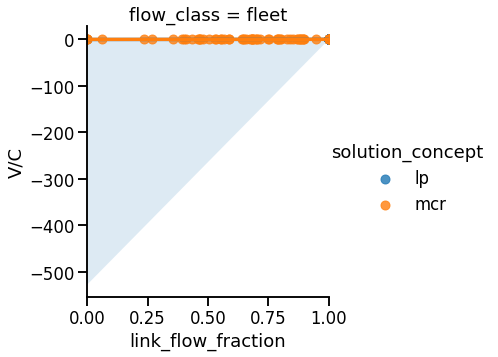

In [19]:
sns.lmplot(data=link_flow_df.xs('fleet', level='flow_class', drop_level=False).reset_index(),
            y="V/C",
            x="link_flow_fraction",
            hue="solution_concept",
            col="flow_class",
            truncate=True,
            robust=True
           )

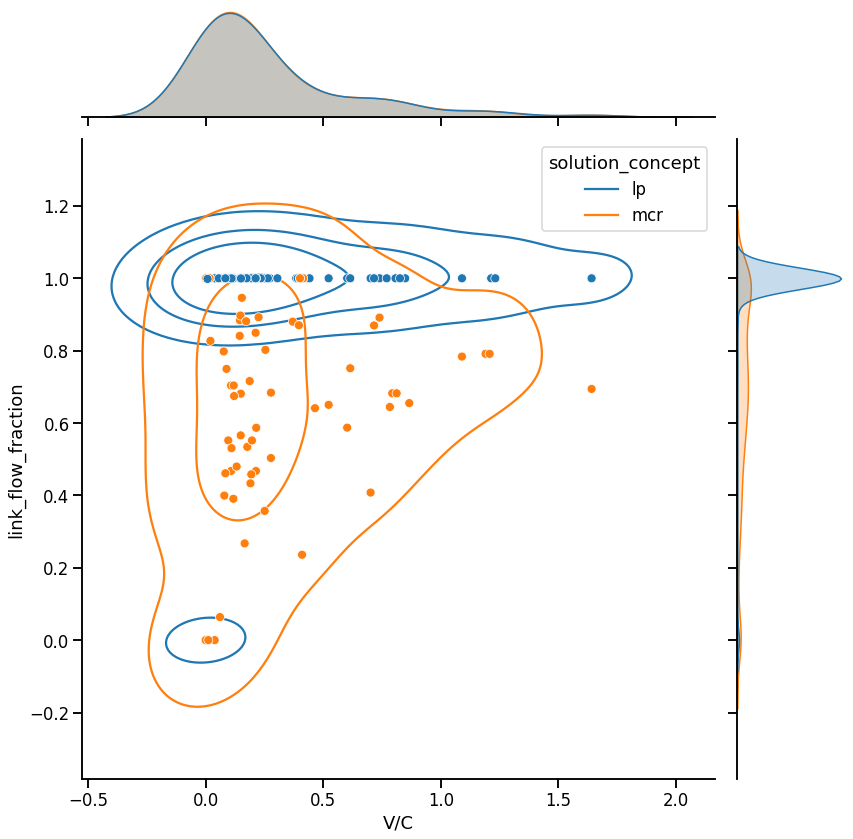

In [20]:
g = sns.jointplot(data=link_flow_df.xs('fleet', level='flow_class', drop_level=False).reset_index(),
            x="V/C",
            y="link_flow_fraction",
            hue="solution_concept",
            height=12,
           )
g.plot_joint(sns.kdeplot, zorder=0, levels=4)

In [21]:
link_vc = pd.DataFrame(aggregate_link_flow.groupby('link_id').mean()).join(sioux_falls_links.capacity)
link_vc['V/C'] = link_vc.aggregate_flow / link_vc.capacity

In [22]:
link_flow_pvt = (
    link_flow_df.reset_index()
                .pivot(index=['link_id', 'flow_class'],
                       columns='solution_concept',
                       values='link_flow_fraction')
                #.join(link_flow_df["Fleet V/C"])
                .join(link_vc['V/C'])
)
link_flow_pvt['fleet link flow fraction increase'] = link_flow_pvt.lp - link_flow_pvt.mcr

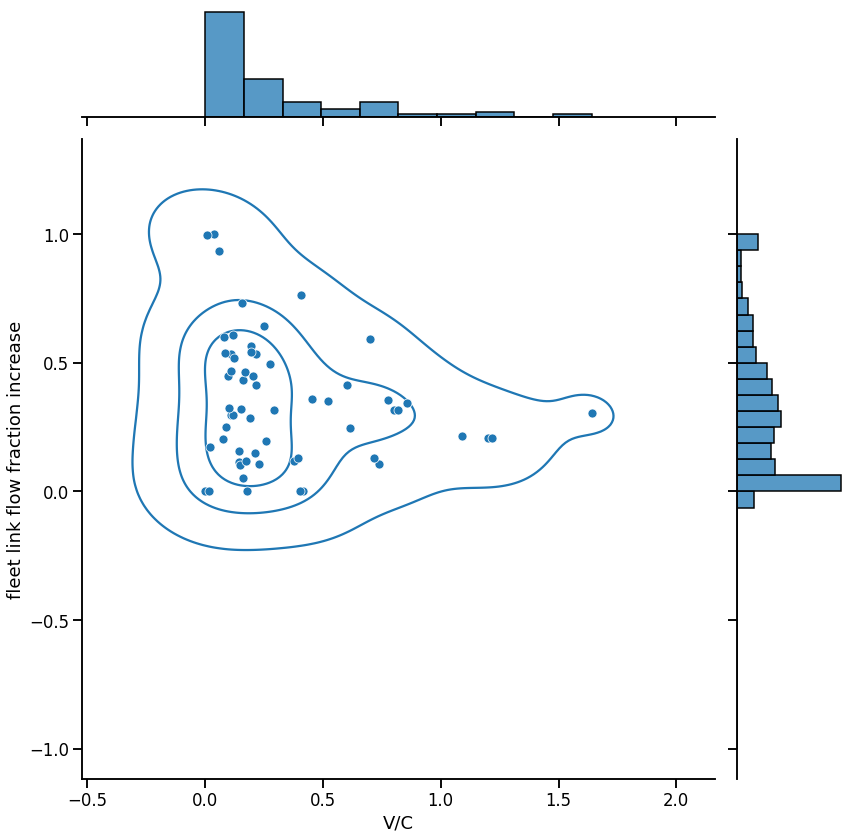

In [23]:
g = sns.jointplot(
    data=link_flow_pvt.xs('fleet', level='flow_class', drop_level=False),
    x='V/C',
    y='fleet link flow fraction increase',
    height=12,
    #hue='flow_class',
)
g.plot_joint(sns.kdeplot, zorder=0, levels=4)

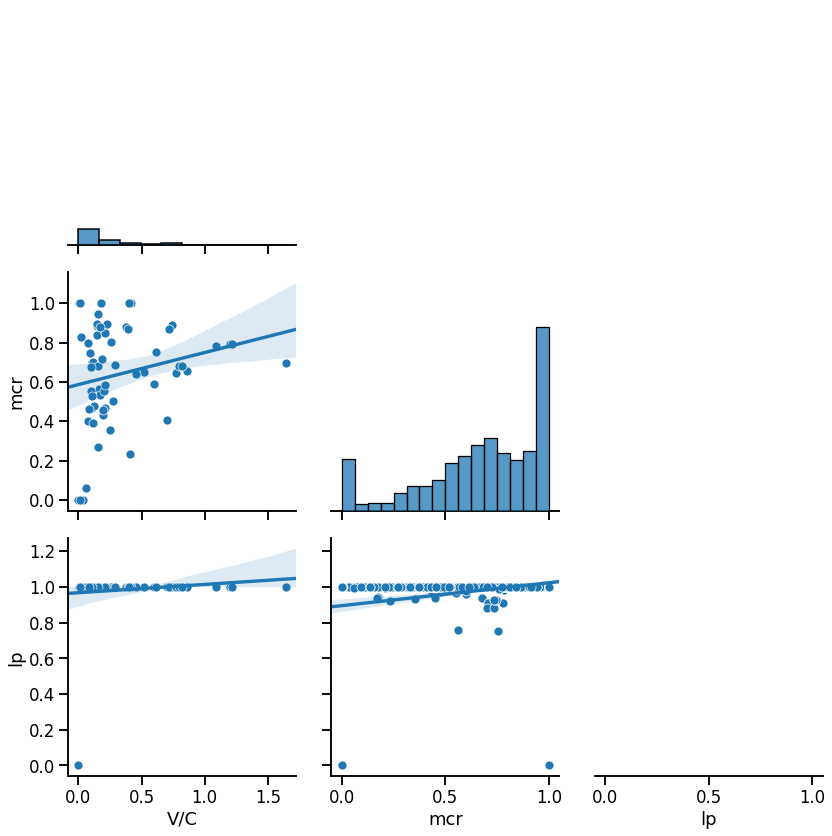

In [24]:

g = sns.PairGrid(
    data=link_flow_pvt.xs('fleet', level='flow_class').reset_index(),
    vars=['V/C', 'mcr', 'lp',],
    height=4,
    corner=True,
)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
#g.map_offdiag(sns.kdeplot, levels=3, color=".2")
g.map_offdiag(sns.regplot, scatter=False, truncate=False)#, robust=True)

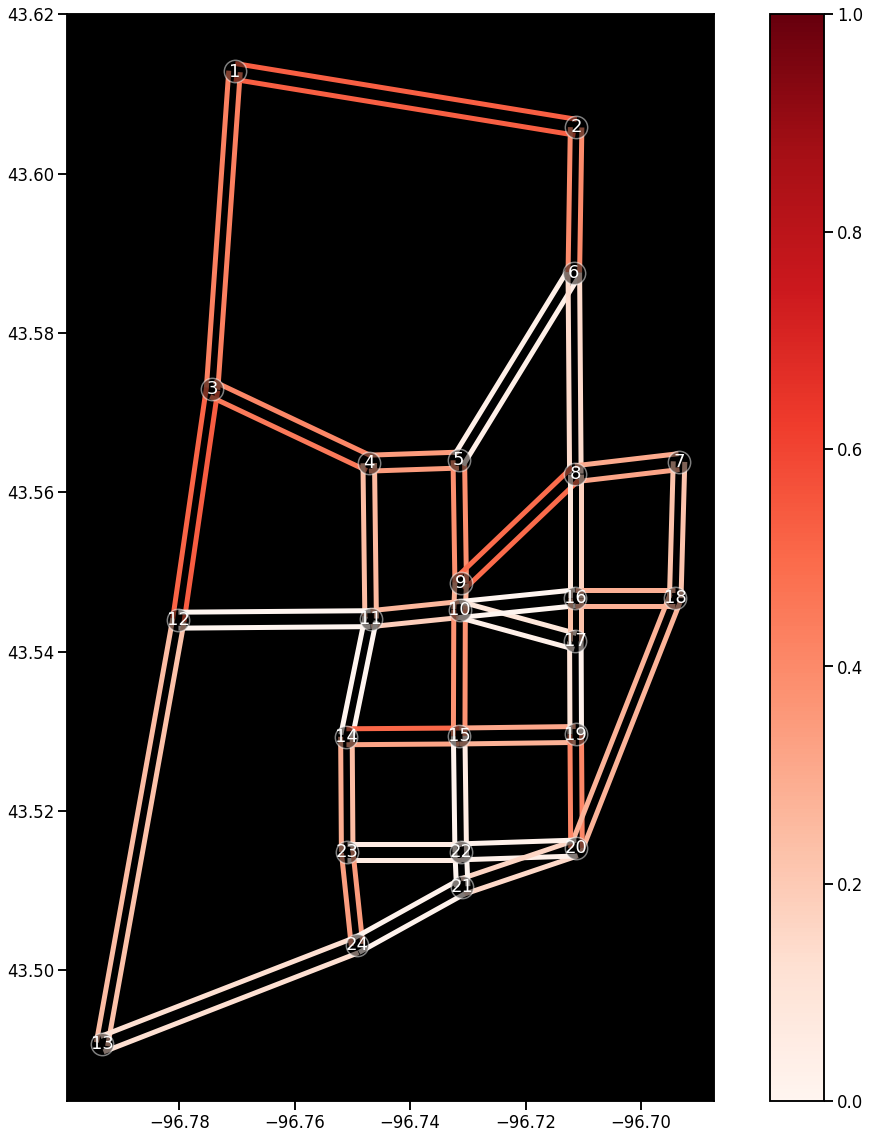

In [520]:
ax = sioux_falls_links.plot(sioux_falls.mcr.fleet_link_fraction, figsize=(20, 20), cmap='Reds', vmin=0, vmax=1, legend=True, linewidth=5)
ax.set_facecolor('k')
nodes = gpd.GeoDataFrame(sioux_falls_nodes, geometry='node_geometry')
nodes.plot(ax=ax, markersize=500, zorder=2, color='black', edgecolor='white', alpha=0.5)
for idx, row in nodes.iterrows():
    ax.annotate(row.name,
                xy=(row.node_geometry.x, row.node_geometry.y),
                color='white',
                ha='center',
                va='center',
                fontsize=18,
               )

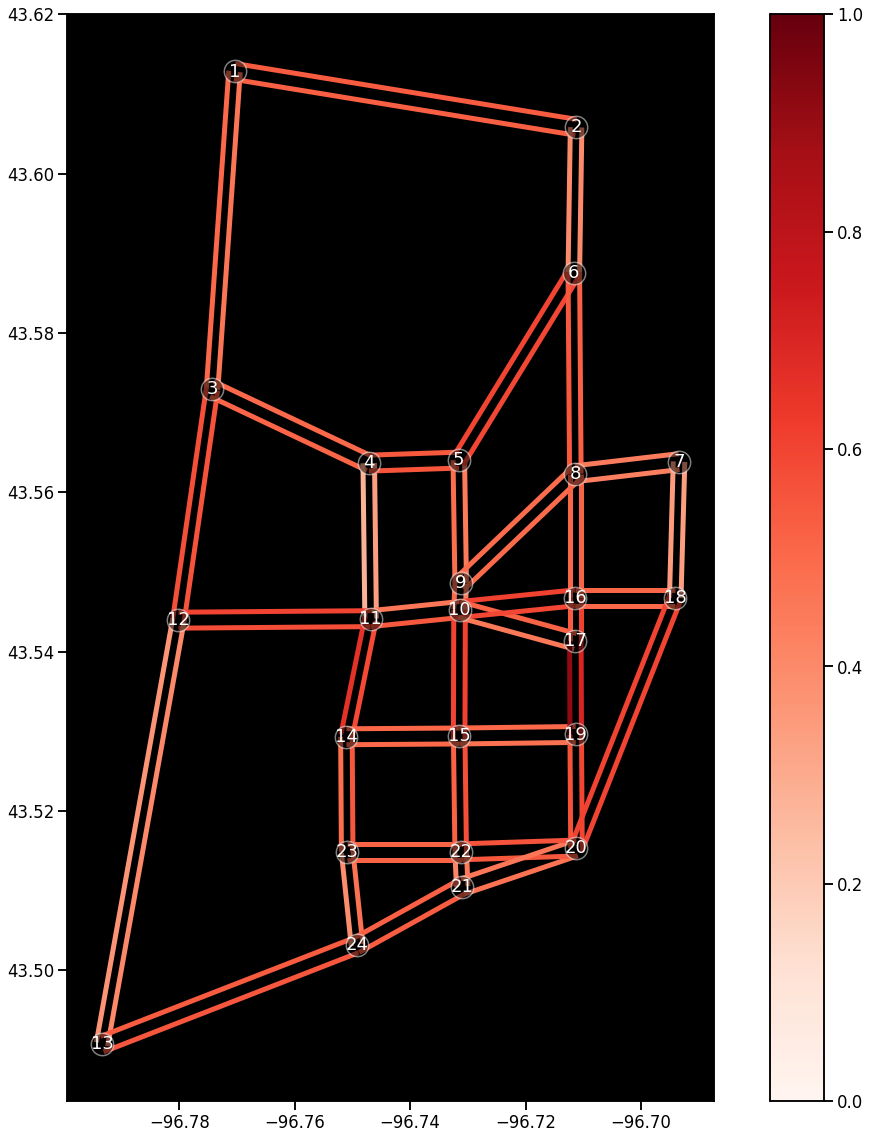

In [521]:
ax = sioux_falls_links.plot(sioux_falls.lp.fleet_link_fraction, figsize=(20, 20), cmap='Reds', vmin=0, vmax=1, legend=True, linewidth=5)
ax.set_facecolor('k')
nodes = gpd.GeoDataFrame(sioux_falls_nodes, geometry='node_geometry')
nodes.plot(ax=ax, markersize=500, zorder=2, color='black', edgecolor='white', alpha=0.5)
for idx, row in nodes.iterrows():
    ax.annotate(row.name,
                xy=(row.node_geometry.x, row.node_geometry.y),
                color='white',
                ha='center',
                va='center',
                fontsize=18,
               )

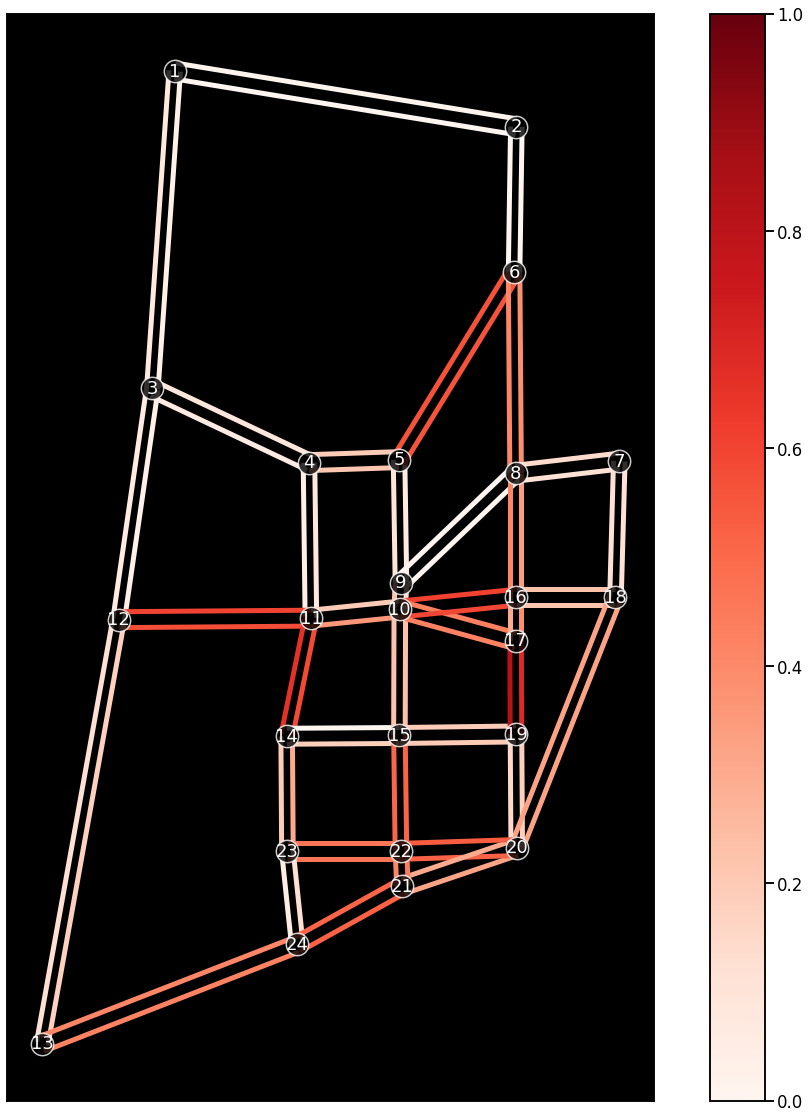

In [580]:
ax = sioux_falls_links.plot(sioux_falls.lp.fleet_link_fraction - sioux_falls.mcr.fleet_link_fraction,
                            figsize=(20, 20), cmap='Reds', vmin=0, vmax=1, legend=True, linewidth=5)
ax.set_facecolor('k')
nodes = gpd.GeoDataFrame(sioux_falls_nodes, geometry='node_geometry')
nodes.plot(ax=ax, markersize=500, zorder=2, color='black', edgecolor='white', alpha=0.8)
for idx, row in nodes.iterrows():
    ax.annotate(row.name,
                xy=(row.node_geometry.x, row.node_geometry.y),
                color='white',
                ha='center',
                va='center',
                fontsize=18,
               )
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,
    right=False,      # ticks along the bottom edge are off
    labelleft=False) # labels along the bottom edge are off

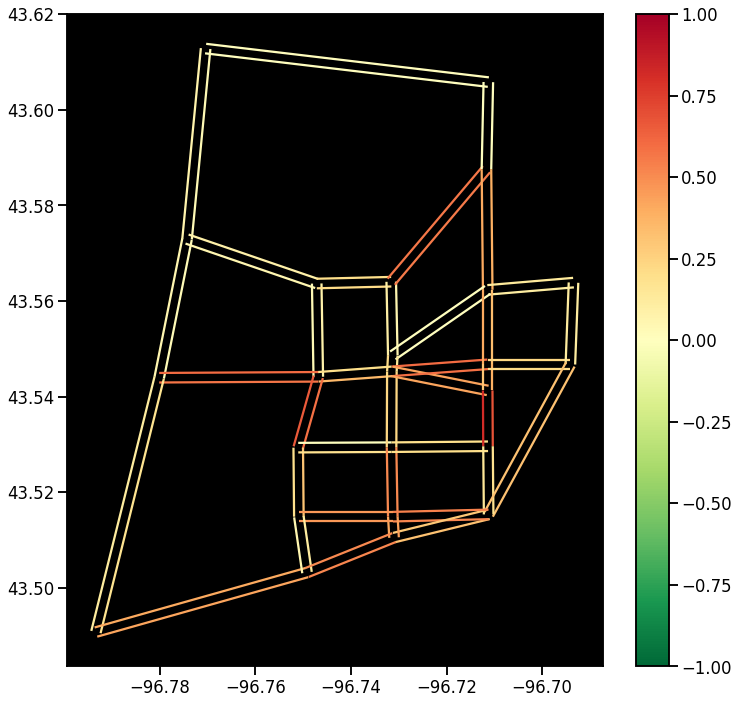

In [523]:
ax = sioux_falls_links.plot(sioux_falls.lp.fleet_link_fraction - sioux_falls.mcr.fleet_link_fraction, vmin=-1, vmax=1, figsize=(12, 12), cmap='RdYlGn_r', legend=True)
ax.set_facecolor('k')

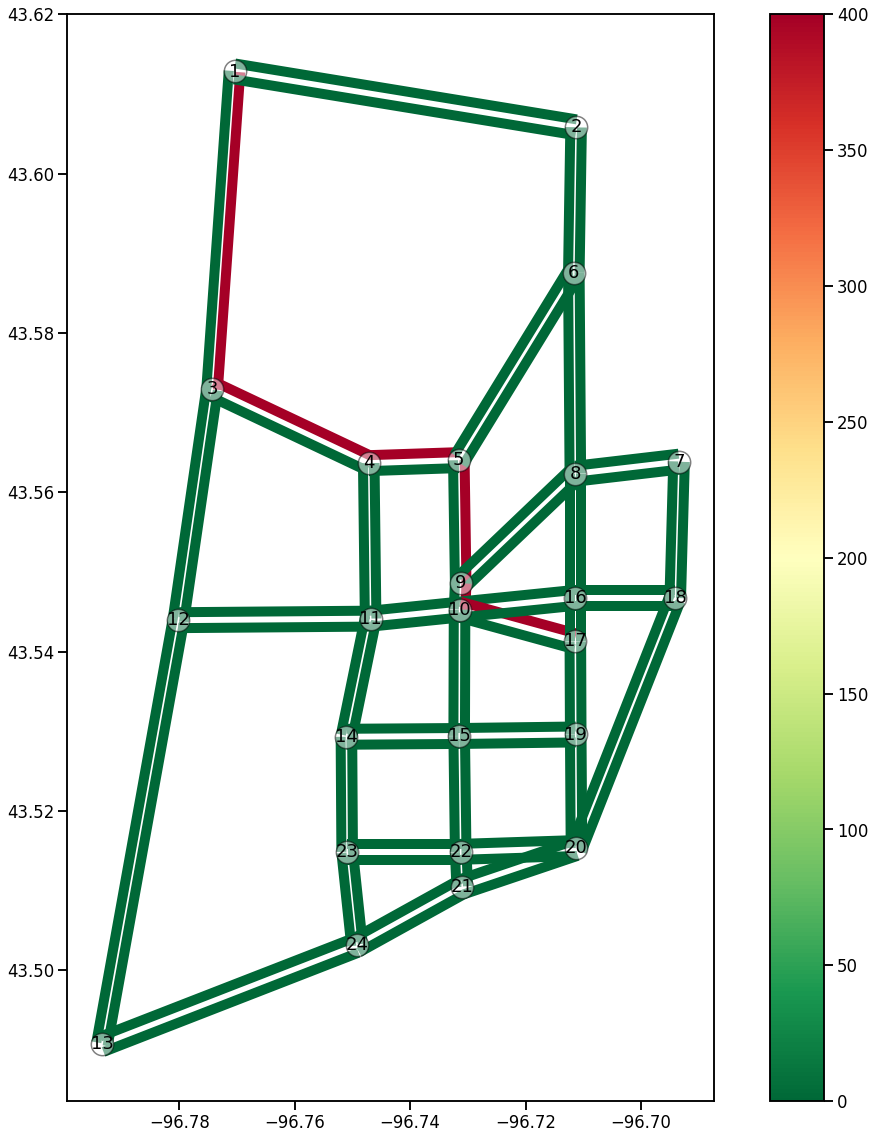

In [524]:
ax = sioux_falls_links.plot(sioux_falls.mcr.user.trip_link_flow(15),
                       figsize=(20, 20),
                       cmap='RdYlGn_r',
                       linewidth=10,
                       legend=True
                      )
nodes = gpd.GeoDataFrame(sioux_falls_nodes, geometry='node_geometry')
nodes.plot(ax=ax, markersize=500, zorder=2, color='white', edgecolor='black', alpha=0.5)
for idx, row in nodes.iterrows():
    ax.annotate(row.name,
                xy=(row.node_geometry.x, row.node_geometry.y),
                color='black',
                ha='center',
                va='center',
                fontsize=18,
               )

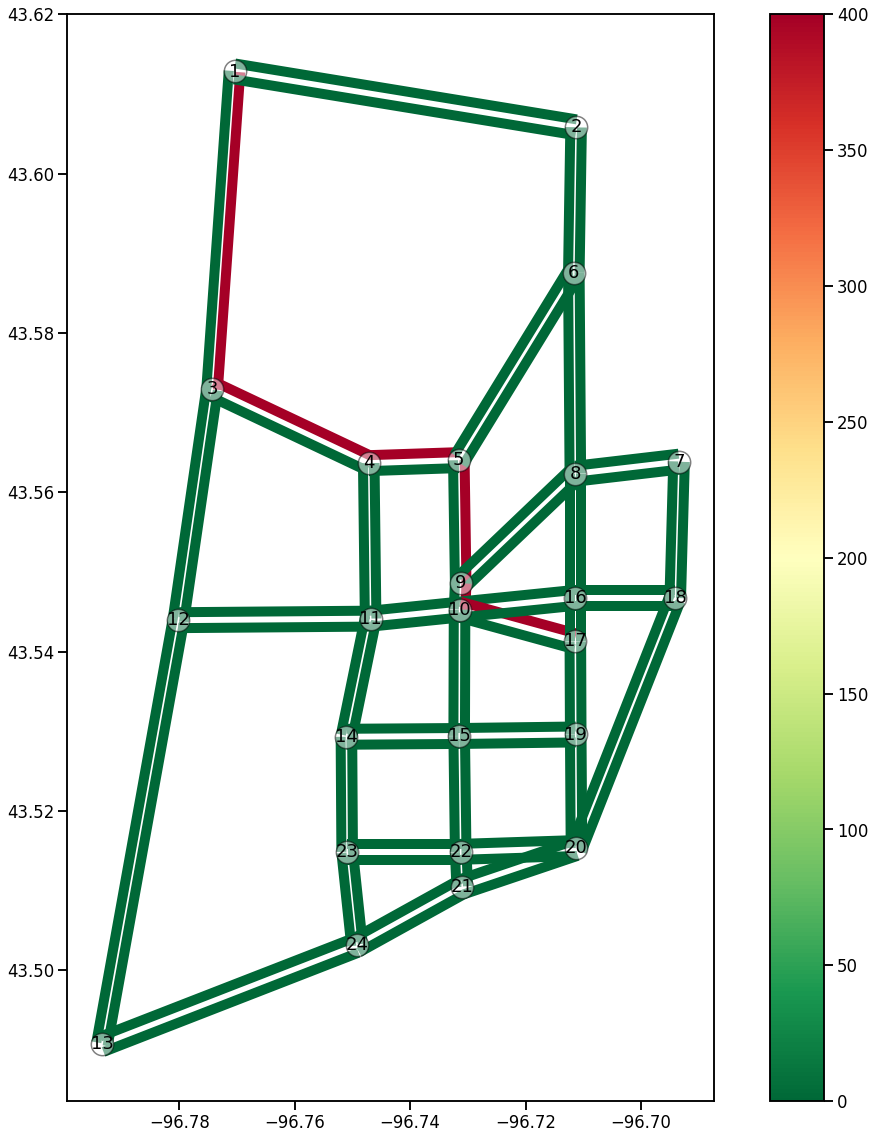

In [525]:
ax = sioux_falls_links.plot(sioux_falls.lp.fleet.trip_link_flow(15),
                       figsize=(20, 20),
                       cmap='RdYlGn_r',
                       linewidth=10,
                       legend=True
                      )
nodes = gpd.GeoDataFrame(sioux_falls_nodes, geometry='node_geometry')
nodes.plot(ax=ax, markersize=500, zorder=2, color='white', edgecolor='black', alpha=0.5)
for idx, row in nodes.iterrows():
    ax.annotate(row.name,
                xy=(row.node_geometry.x, row.node_geometry.y),
                color='black',
                ha='center',
                va='center',
                fontsize=18,
               )

In [526]:
paths_df = sioux_falls.to_path_dataframe()
paths_df

flow
trip_id path_id solution_concept flow_class       
0       0       lp               fleet         0.0
                                 user        100.0
                mcr              fleet         0.0
                                 user        100.0
1       50      lp               fleet         0.0
...                                            ...
526     2107    mcr              user          0.0
527     2202    lp               fleet         0.0
                                 user        700.0
                mcr              fleet         0.0
                                 user        700.0

[8908 rows x 1 columns]

In [527]:
link_path_index = sioux_falls.link_path_index
link_path_index.head()

link_id
path_id         
0              0
1              0
1              4
2              0
2              4

In [528]:
trip_link_flow = (paths_df.join(link_path_index, on='path_id')
                          .groupby(['trip_id', 'solution_concept', 'flow_class', 'link_id'])
                          [['flow']]
                          .sum()
                          .sort_index()
                 )
trip_link_flow.loc[15].loc['lp']

flow
flow_class link_id       
fleet      0          0.0
           1        400.0
           3          0.0
           5        400.0
           6          0.0
           8        400.0
           9          0.0
           12       400.0
           15         0.0
           17         0.0
           19         0.0
           21         0.0
           24       400.0
           27         0.0
           29       400.0
           31         0.0
           33         0.0
           35         0.0
           40         0.0
           44         0.0
           48         0.0
           54         0.0
           57         0.0
user       0          0.0
           1          0.0
           3          0.0
           5          0.0
           6          0.0
           8          0.0
           9          0.0
           12         0.0
           15         0.0
           17         0.0
           19         0.0
           21         0.0
           24         0.0
           27         0.0
           29         0.0
           31         0.0
           33         0.0
           35         0.0
           40         0.0
           44         0.0
           48         0.0
           54         0.0
           57         0.0

In [529]:
eps = 1e-4
mcr_all_fleet_trips = sioux_falls.mcr.fleet_trip_fraction >= 1.0 - eps
mcr_no_fleet_trips = sioux_falls.mcr.fleet_trip_fraction <= 0.0 + eps
mcr_partial_fleet_trips = ~(mcr_all_fleet_trips | mcr_no_fleet_trips)

assert (~(mcr_all_fleet_trips & mcr_no_fleet_trips & mcr_partial_fleet_trips)).all()
assert (mcr_all_fleet_trips | mcr_no_fleet_trips | mcr_partial_fleet_trips).all()

cfs_all_fleet_trips = sioux_falls.lp.fleet_trip_fraction >= 1.0 - eps
cfs_no_fleet_trips = sioux_falls.lp.fleet_trip_fraction <= 0.0 + eps
cfs_partial_fleet_trips = ~(cfs_all_fleet_trips | cfs_no_fleet_trips)

assert (~(cfs_all_fleet_trips & cfs_no_fleet_trips & cfs_partial_fleet_trips)).all()
assert (cfs_all_fleet_trips | cfs_no_fleet_trips | cfs_partial_fleet_trips).all()

In [530]:
#TODO: look at number of usable paths per od

In [531]:
uncontrolled_mcr_controlled_cfs = mcr_no_fleet_trips & cfs_all_fleet_trips
uncontrolled_mcr_controlled_cfs.nonzero()

(array([ 15,  47,  48,  54,  57,  66,  75,  76,  78,  89,  95,  97, 100,
        101, 113, 116, 124, 130, 144, 147, 148, 149, 153, 154, 165, 188,
        193, 208, 217, 233, 237, 241, 248, 252, 254, 257, 260, 277, 279,
        281, 283, 284, 285, 288, 289, 290, 292, 293, 299, 300, 302, 319,
        326, 337, 338, 344, 346, 347, 354, 355, 357, 359, 360, 361, 365,
        368, 369, 377, 378, 381, 389, 394, 397, 398, 404, 414, 415, 423,
        430, 431, 432, 441, 444, 445, 450, 451, 453, 468, 470, 472, 479,
        480, 481, 492, 496, 501, 503, 512]),)

In [532]:
mcr_trips_composition = np.array(['mixed' for _ in range(len(mcr_all_fleet_trips))])
mcr_trips_composition[mcr_all_fleet_trips] = 'fleet'
mcr_trips_composition[mcr_no_fleet_trips] = 'user'

cfs_trips_composition = np.array(['mixed' for _ in range(len(cfs_all_fleet_trips))])
cfs_trips_composition[cfs_all_fleet_trips] = 'fleet'
cfs_trips_composition[cfs_no_fleet_trips] = 'user'

trip_composition = pd.DataFrame({'cfs': cfs_trips_composition, 'mcr': mcr_trips_composition, 'trip_id': np.arange(len(mcr_all_fleet_trips))})

In [533]:
long_form_trip_composition = pd.melt(trip_composition, id_vars=['trip_id'], var_name='kind', value_name='composition')

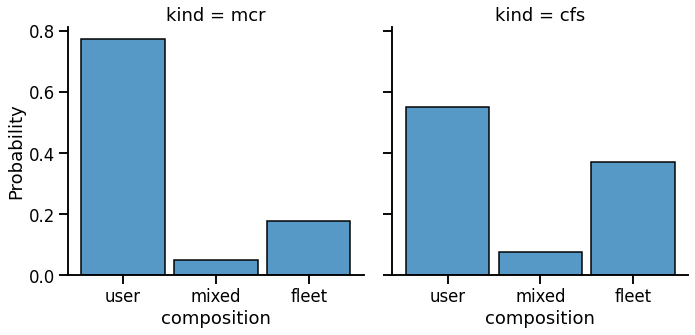

In [534]:
sns.displot(data=long_form_trip_composition, x='composition', col='kind',
            stat='probability', common_norm=False,
            col_order=['mcr', 'cfs'], shrink=0.9)

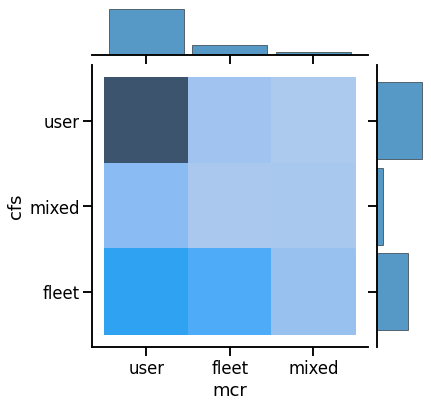

In [535]:
sns.jointplot(data=trip_composition, x='mcr', y='cfs', kind='hist', 
              joint_kws=dict(stat='probability'),
              marginal_kws=dict(shrink=0.9, linewidth=0.5),
             )

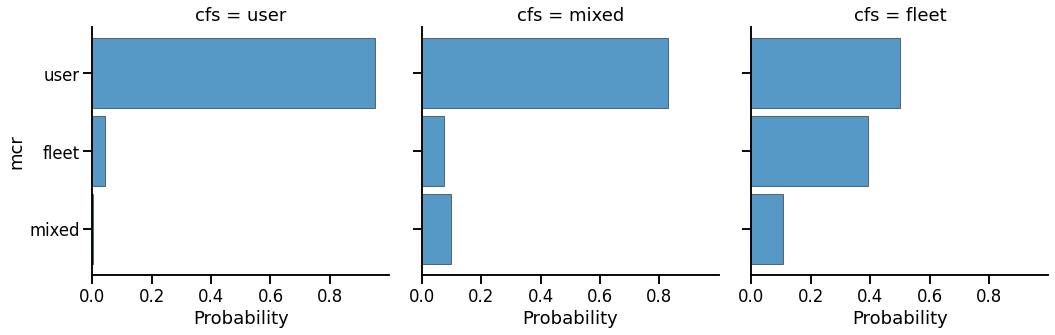

In [536]:
sns.displot(trip_composition, y='mcr', kind='hist', col='cfs',
            stat='probability',
            common_norm=False,
            discrete=True,
            shrink=0.9, linewidth=0.5, col_order=['user', 'mixed', 'fleet'])

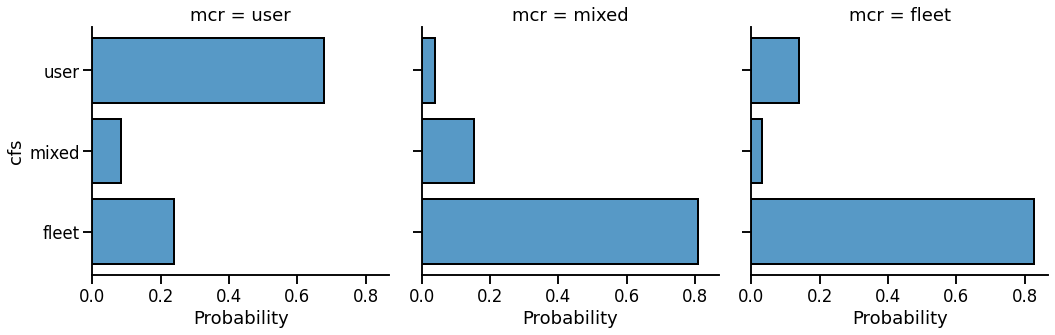

In [585]:
sns.displot(trip_composition, y='cfs', kind='hist', col='mcr',
            stat='probability',
            common_norm=False,
            shrink=0.8, linewidth=2, col_order=['user', 'mixed', 'fleet'])

In [538]:
plt.hist(d, bins=np.linspace(-1, 1, 21))

NameError: name 'd' is not defined

In [ ]:
plt.hist(sioux_falls.mcr.fleet_link_fraction)

In [ ]:
plt.hist(sioux_falls.lp.fleet_link_fraction)

<ipython-input-7-dd3df04c2cb2>:96: RuntimeWarning: invalid value encountered in true_divide
  return self.fleet.link_flow / (self.fleet.link_flow + self.user.link_flow)


(array([  35.,    0.,    0.,    0.,    0.,    0.,    0.,    2.,    2.,
        1892.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

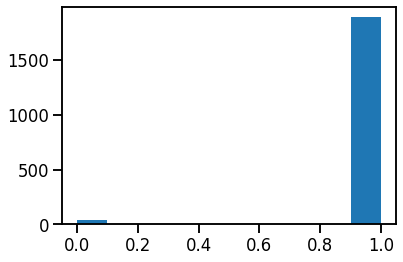

In [42]:
plt.hist(pgh.lp.fleet_link_fraction)

<ipython-input-7-dd3df04c2cb2>:96: RuntimeWarning: invalid value encountered in true_divide
  return self.fleet.link_flow / (self.fleet.link_flow + self.user.link_flow)


(array([144.,  27.,  51., 105., 114., 197., 273., 254., 234., 549.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

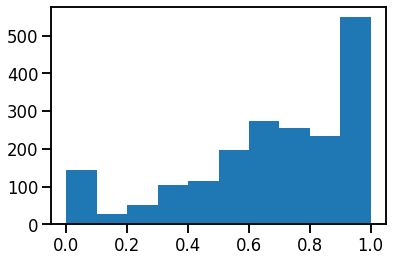

In [44]:
plt.hist(pgh.mcr.fleet_link_fraction)

<ipython-input-494-dd3df04c2cb2>:96: RuntimeWarning: invalid value encountered in true_divide
  return self.fleet.link_flow / (self.fleet.link_flow + self.user.link_flow)


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  29., 937.,  12.,  15.,  32.,  32.,  32.,  42.,  37.,
         49.,  39.,  68.,  55.,  75.,  65.,  66.,  75.,  61.,  71.,  53.,
         50.,  52.,  56.,  38.,  52., 448.]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
         0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 <BarContainer object of 50 artists>)

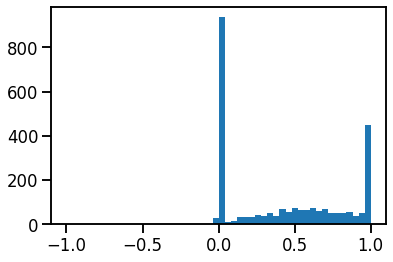

In [541]:
plt.hist(pgh.lp.fleet_link_fraction - pgh.mcr.fleet_link_fraction, bins=np.linspace(-1, 1, 51))

(array([419.,   3.,   0.,   2.,   1.,   1.,   5.,   1.,   0.,  96.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

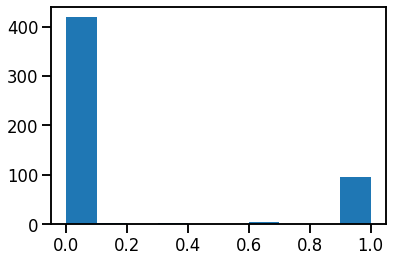

In [542]:
plt.hist(sioux_falls.mcr.fleet_trip_fraction)

(array([294.,   3.,   4.,   4.,   2.,   5.,   4.,   4.,   8., 200.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

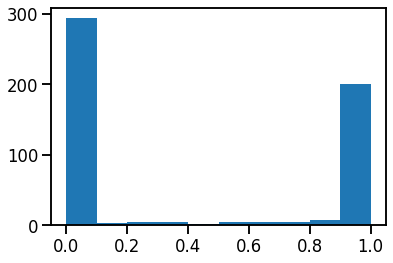

In [543]:
plt.hist(sioux_falls.lp.fleet_trip_fraction)

<ipython-input-494-dd3df04c2cb2>:92: RuntimeWarning: invalid value encountered in true_divide
  return self.fleet.path_flow / (self.fleet.path_flow + self.user.path_flow)


(array([439.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 127.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

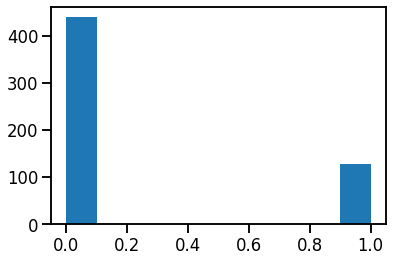

In [544]:
plt.hist(sioux_falls.mcr.fleet_path_fraction)

<ipython-input-494-dd3df04c2cb2>:92: RuntimeWarning: invalid value encountered in true_divide
  return self.fleet.path_flow / (self.fleet.path_flow + self.user.path_flow)


(array([304.,   2.,   4.,   4.,   2.,   5.,   3.,   3.,   6., 235.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

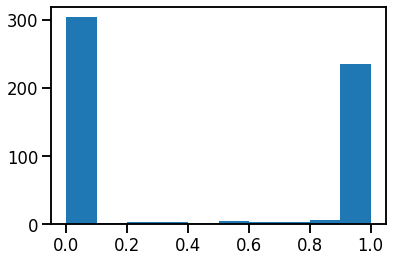

In [545]:
plt.hist(sioux_falls.lp.fleet_path_fraction)

In [34]:
pgh.mcr.data['result']

'examples/results/pittsburgh-network-cathedral-5k-0.5-thru-demand_fw-so/results-2021-04-26T21:46:36'

In [35]:
result = FWResult.load(os.path.join('..', pgh.mcr.data['result']))

In [37]:
# use the network that has zone and link info
#network = DiGraph.load('../examples/results/pittsburgh-city-network-so-tmp/results-2021-02-08T16:49:04')
network = DiGraph.load(os.path.join('..', pgh.mcr.data['result']))

In [38]:
df = gpd.GeoDataFrame({int(i): link for i, link in network.link_info.items()}).transpose()
df['geometry'] = df.geometry.apply(shape)
df.set_geometry('geometry', inplace=True)

In [39]:
df['link_flow'] = result.flow.to_array()
df['link_cost'] = result.cost.to_array()
df['lp_fleet_flow_fraction'] = pgh.lp.fleet_link_fraction
df.lp_fleet_flow_fraction.fillna(0.0, inplace=True)
df['mcr_fleet_flow_fraction'] = pgh.mcr.fleet_link_fraction
df.mcr_fleet_flow_fraction.fillna(0.0, inplace=True)

<ipython-input-7-dd3df04c2cb2>:96: RuntimeWarning: invalid value encountered in true_divide
  return self.fleet.link_flow / (self.fleet.link_flow + self.user.link_flow)


In [199]:
17000/4 - 2335

1915.0

<AxesSubplot:>

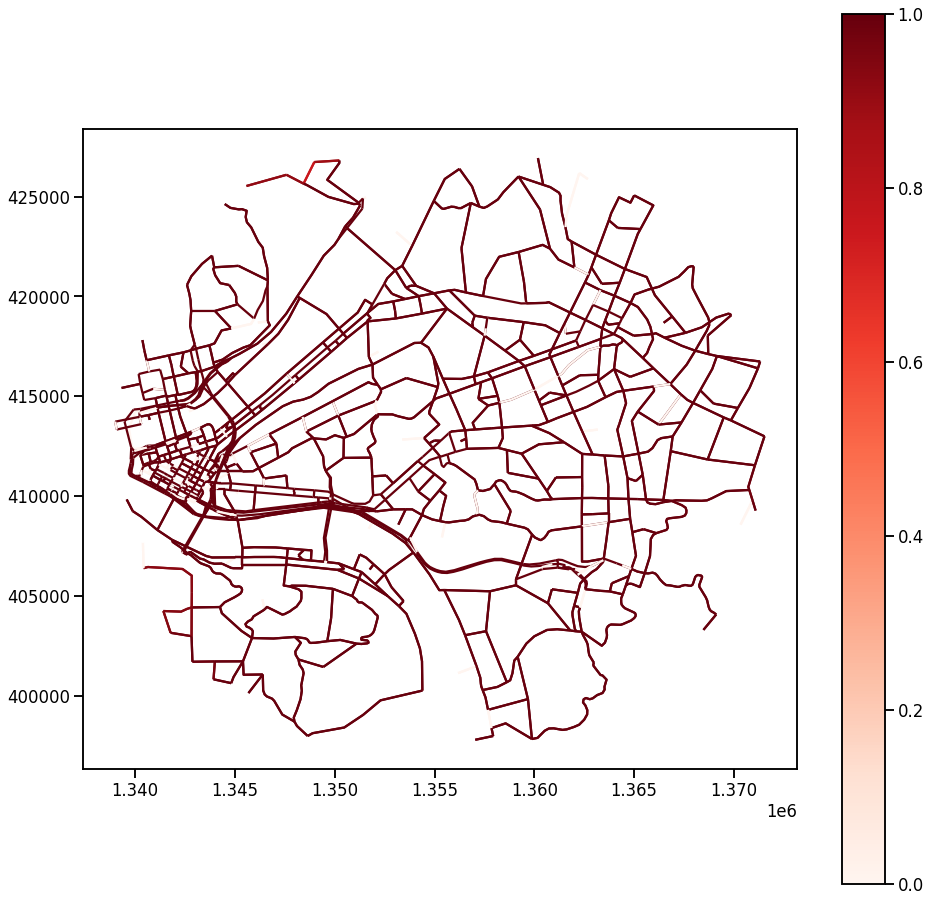

In [40]:
df.plot('lp_fleet_flow_fraction', cmap='Reds', figsize=(16, 16), legend=True)

<AxesSubplot:>

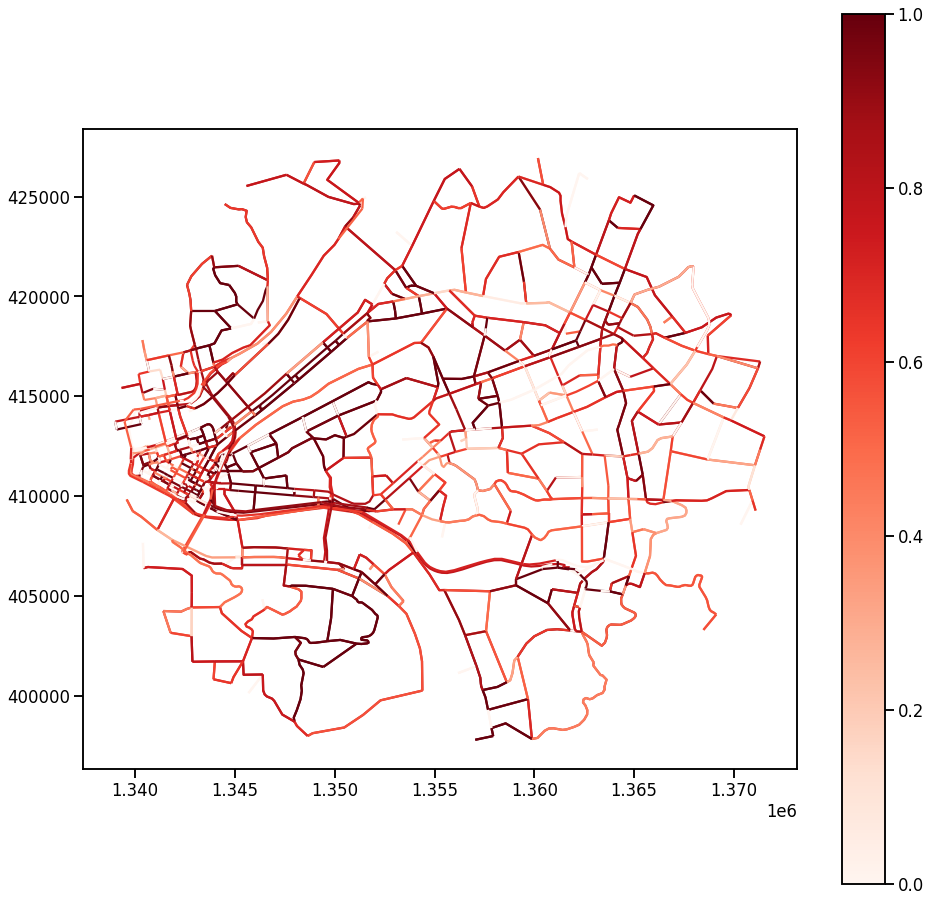

In [41]:
df.plot('mcr_fleet_flow_fraction', cmap='Reds', figsize=(16, 16), legend=True)

In [66]:
df.link_cost.describe()

count      5222.000000
mean       1868.844471
std        5280.926097
min           0.000000
25%         500.000000
50%        1000.000000
75%        2000.000000
max      136072.208129
Name: link_cost, dtype: float64

In [69]:
df.link_flow.describe()

count    5222.000000
mean      314.921842
std       512.102370
min         0.000000
25%         0.000000
50%         0.000398
75%       515.194813
max      6648.000000
Name: link_flow, dtype: float64

In [95]:
np.percentile(lp_fleet_link_flow - mcr_fleet_link_flow, 75)

182.22201368024614